# **0. Import library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# **1. Read data**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/introdiction to DS/FinalProject/data/UsedCarListingCleaning.csv')

In [3]:
# unique_make_values = df['make'].value_counts() == 1
# unique_make_values = unique_make_values[unique_make_values].index
# df = df[df['make'].isin(unique_make_values) == False]
del df['Unnamed: 0']
del df['name']
df['year'] = df['year'].astype(object)

In [ ]:
df

,make,model,price,year,exterior_color,interior_color,mileage,num_seats,num_doors,origin,style,transmission,drivetrain,fuel,liter
0,Ford,Everest,950,2022,Đen,Đen,30000,7,5.0,Nhập khẩu,SUV,Số tự động,RFD - Dẫn động cầu sau,Dầu,2.00
1,Lexus,RX,1990,2017,Trắng,Đen,50000,5,5.0,Nhập khẩu,SUV,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,2.00
2,Mercedes Benz,S class,2790,2020,Trắng,Nâu,30000,5,4.0,Lắp ráp trong nước,Sedan,Số tự động,RFD - Dẫn động cầu sau,Xăng,3.00
3,Toyota,Vios,448,2019,Đen,Kem,46000,5,4.0,Lắp ráp trong nước,Sedan,Số tự động,FWD - Dẫn động cầu trước,Xăng,1.50
4,Volvo,S60,1279,2021,Trắng,Đen,19000,5,4.0,Nhập khẩu,Sedan,Số tự động,AWD - 4 bánh toàn thời gian,Xăng,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24636,Ford,Ranger,500,2015,Bạc,Đen,0,5,4.0,Nhập khẩu,Bán tải / Pickup,Số tay,RFD - Dẫn động cầu sau,Dầu,2.20
24637,Chevrolet,Lacetti,195,2011,Vàng,Ghi,0,5,4.0,Lắp ráp trong nước,Sedan,Số tay,FWD - Dẫn động cầu trước,Xăng,1.60
24638,Kia,Morning,220,2013,Trắng,Đen,0,5,5.0,Lắp ráp trong nước,Hatchback,Số tay,FWD - Dẫn động cầu trước,Xăng,1.25
24639,Kia,Morning,365,2016,Trắng,Xám,0,5,5.0,Lắp ráp trong nước,Hatchback,Số tự động,FWD - Dẫn động cầu trước,Xăng,1.25


In [ ]:
for column in df.columns:
  if column.__eq__('price') | column.__eq__('mileage') | column.__eq__('liter'):
    continue
  print('The number of unique level for {} is {}'.format(column, len(df[column].unique())))

The number of unique level for make is 71
The number of unique level for model is 459
The number of unique level for year is 35
The number of unique level for exterior_color is 17
The number of unique level for interior_color is 17
The number of unique level for num_seats is 20
The number of unique level for num_doors is 8
The number of unique level for origin is 2
The number of unique level for style is 10
The number of unique level for transmission is 3
The number of unique level for drivetrain is 5
The number of unique level for fuel is 4


# **2. One hot encoding and Train test split**

In [4]:
label_encoders = {}

for column in df.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    label_encoders[column] = label_encoder

joblib.dump(label_encoders, 'label_encoders.pkl')

In [33]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Load label endcoder and transform

In [ ]:
# loaded_label_encoders = joblib.load('label_encoders.pkl')

# for column in df1.select_dtypes(include=['object']).columns:
#     loaded_label_encoder = loaded_label_encoders[column]
#     df1[column] = loaded_label_encoder.transform(df1[column])

# **3. Standardization for numeric features**

In [ ]:
num_cols = ['mileage']
scaled_num_cols = ['scaled_mileage']
num_scaler = StandardScaler().fit(X_train[num_cols])

In [ ]:
X_train_num_scaled = pd.DataFrame(num_scaler.transform(X_train[num_cols]),
                                  index = X_train.index, columns = scaled_num_cols)

In [ ]:
X_test_num_scaled = pd.DataFrame(num_scaler.transform(X_test[num_cols]), index = X_test.index, columns = scaled_num_cols)

In [ ]:
print(X_train_num_scaled.shape, X_test_num_scaled.shape)

(19712, 1) (4929, 1)


In [ ]:
X_train_final = pd.concat([X_train_num_scaled, X_train.drop(num_cols, axis=1)], axis=1)
X_test_final = pd.concat([X_test_num_scaled, X_test.drop(num_cols, axis=1)], axis=1)
print(X_train_final.shape, X_test_final.shape)

(19712, 14) (4929, 14)


# **4. Check the train test data in terms of distribution**

<ipython-input-37-3ebb8ea5aa18>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train,hist_kws={"label":'train'})
<ipython-input-37-3ebb8ea5aa18>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,hist_kws={"label":'test'})


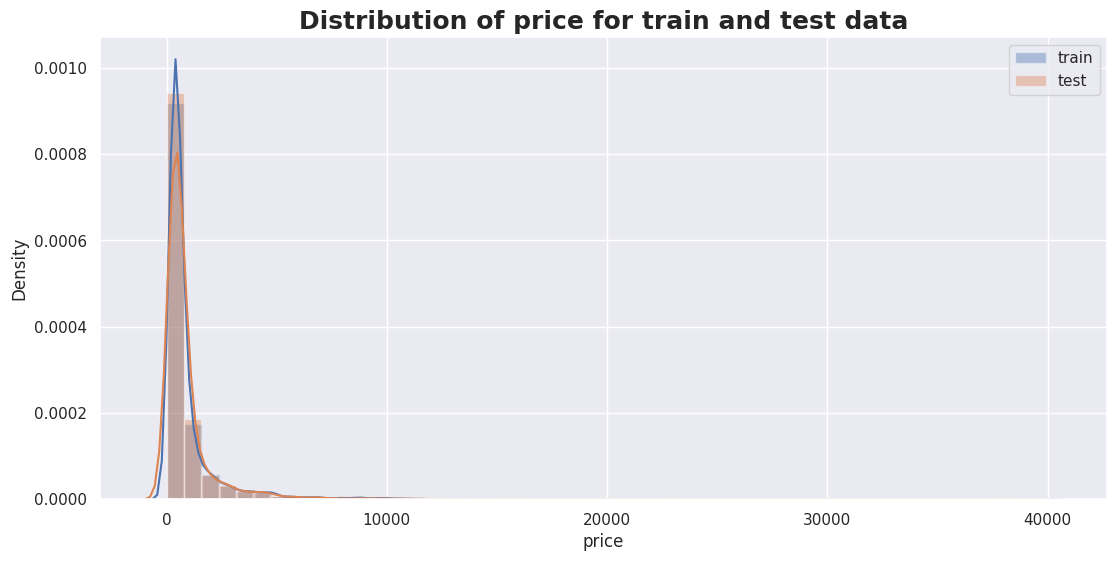

In [ ]:
sns.set(rc={"figure.figsize": (13, 6)})
sns.distplot(y_train,hist_kws={"label":'train'})
sns.distplot(y_test,hist_kws={"label":'test'})
plt.title('Distribution of price for train and test data',fontsize=18,fontweight="bold")
plt.legend()
plt.show()

# **5. Training**

## 5.1. Random forest


In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
predictions = rf_regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 396443.2278604103


In [ ]:
from math import sqrt
print(f'Root Mean Squared Error: {sqrt(mse)}')

Root Mean Squared Error: 629.6373780680514


In [ ]:
mae = mean_absolute_error(y_test, predictions)
print(f'Mean absolute Error: {mae}')

Mean absolute Error: 87.43066156280095


In [ ]:
r_squared = r2_score(y_test, predictions)
print(r_squared)

0.8737454000190087


In [ ]:
print('ytest')
print(y_test)
print('prediction')
print(predictions)

ytest
18220     360
12068    1899
7439      520
5871     3950
22259      28
         ... 
8178      339
1337      389
2480      365
23365    5900
18660     265
Name: price, Length: 4929, dtype: int64
prediction
[ 408.715      1838.78016667  551.70466667 ...  356.12       5864.222
  280.765     ]


In [ ]:
joblib.dump(rf_regressor, '/content/drive/MyDrive/introdiction to DS/FinalProject/models/random_forest_model.joblib')

['/content/drive/MyDrive/introdiction to DS/STA220FinalProject/models/random_forest_model.joblib']

In [ ]:
loaded_model = joblib.load('/content/drive/MyDrive/introdiction to DS/FinalProject/models/random_forest_model.joblib')
predictions = loaded_model.predict(X_test)

## 5.2. XGBoost

In [38]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [46]:
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', eval_metric='rmse', n_estimators=1000, learning_rate=0.05)
xgb_regressor.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
predictions = xgb_regressor.predict(X_test)

In [47]:
mae = mean_absolute_error(y_test, predictions)
print(f'Mean absolute Error: {mae}')

Mean absolute Error: 92.08526690052702


In [49]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 279938.66422019294


In [48]:
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 529.0923021743871


In [50]:
r_squared = r2_score(y_test, predictions)
print(r_squared)

0.9131516353572317


In [51]:
xgb_regressor.save_model('/content/drive/MyDrive/introdiction to DS/FinalProject/models/xgboost_model.json')

In [ ]:
loaded_model = xgb.XGBRegressor()
loaded_model.load_model('/content/drive/MyDrive/introdiction to DS/FinalProject/models/xgboost_model.json')
predictions = loaded_model.predict(X_test)